In [36]:
#Importando os modulos
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#from sklearn.metrics import mean_squared_error
dataset = load_boston()

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Dados faltando, criando uma nova coluna e adicionando ao dataframe
df['MEDV'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#Checando pra ver se tem type no valor nulo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#Verificar o numero de elementos únicos no projeto.
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [9]:
#Checando se há valores nulos
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

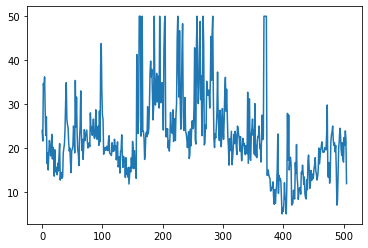

In [10]:
#Gráfico do valor medio das casas ocupados pelo proprietario
df['MEDV'].plot()

In [11]:
#Calcular a correlação de pares de todas as colunas
correlation_matrix = df.corr().round(2)

<AxesSubplot:>

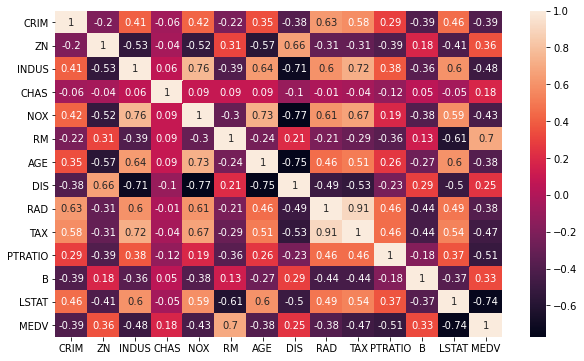

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix, annot=True)

In [15]:
#Minimo e maximo normalização
cols = ['CRIM', 'ZN', 'TAX', 'B']
for col in cols:
    # Encontar o minimo e maximo dessa coluna
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

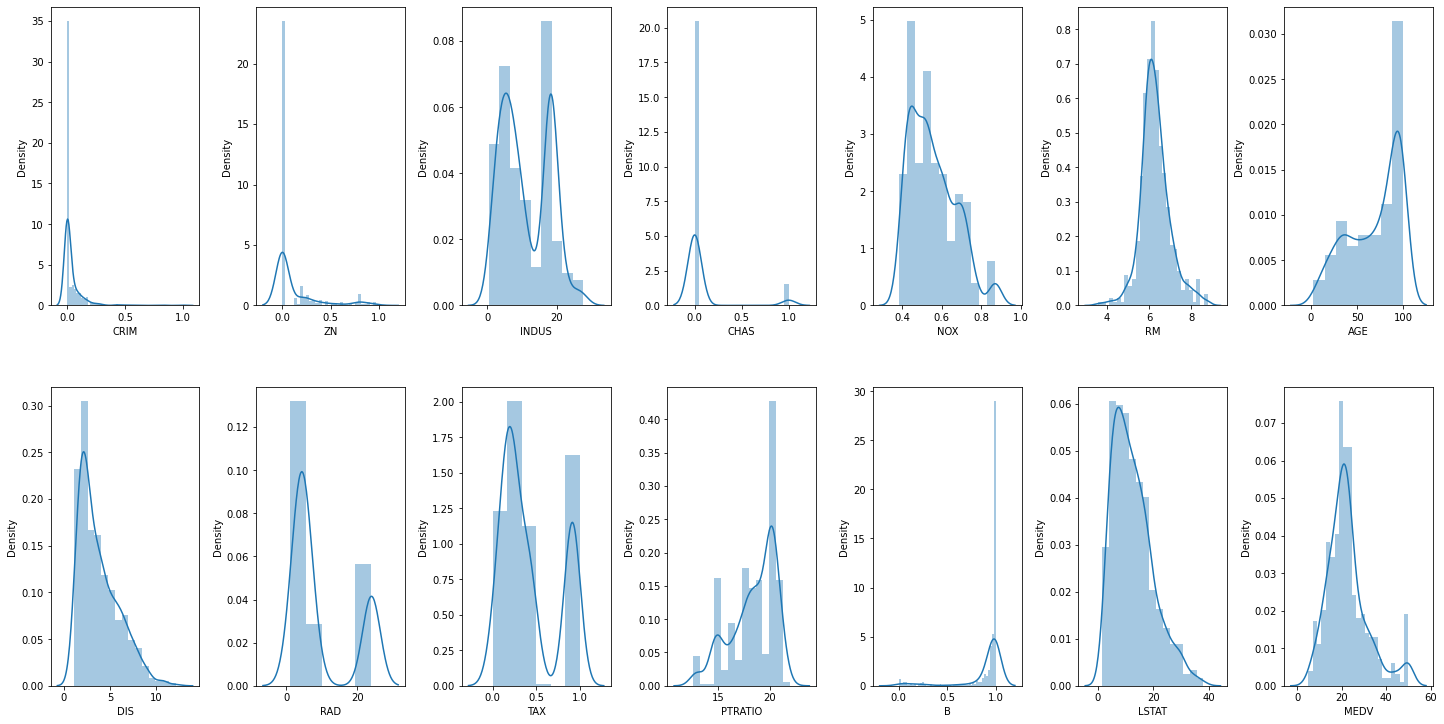

In [16]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [17]:
#Standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#Ajustar os dados
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [18]:
#Divisão de entrada
X = df.drop(columns=['MEDV', 'RAD'], axis=1)
y = df['MEDV']

## Lasso Regression

In [32]:
# Lasso Regression
# Mostre os coeficientes para alpha=0.1 e normalize=True. Mostre também para normalize=False.
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=31)

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
train_score = lasso.score(x_train,y_train)
test_score = lasso.score(x_test, y_test)
coeff_used = np.sum(lasso.coef_!=0)    

print ("Treino score:", train_score )
print ("Teste score: ", test_score)
print ("Predição", lasso_pred)
print ("Número de features usadas: ", coeff_used)
print ("\n \n ")

# Quando normalize for false
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
train_score = lasso.score(x_train,y_train)
test_score = lasso.score(x_test, y_test)
coeff_used = np.sum(lasso.coef_!=0)    
print ("Resultado quando o normalize é falso ")
print ("Treino score:", train_score )
print ("Teste score: ", test_score)
print ("Predição", lasso_pred)
print ("Número de features usadas: ", coeff_used)

Treino score: 0.5977703129974614
Teste score:  0.6084376702298242
Predição [29.12246708 11.19865457 24.09286305 20.42960189 22.33307942 25.46208003
 14.85550066 25.16416365 24.38529336 22.42010499 15.68775577 21.98721864
 17.58819839 19.21495504 21.95847485 22.23812329 22.35953794 25.03506721
 25.15782468 27.33423401 22.35026734 20.62600344 26.53798677 31.01653875
 23.30132645 19.85240372 20.03374706 21.28725713 18.95770653 25.68876912
 27.97512838 19.85194879 20.2770619  20.42713692 24.47800734 25.29697053
 29.92977704 19.65356666 14.43722084 34.65301444 18.7124701  21.25175686
 21.98789824 28.68921319 12.23513293 19.6259544  27.80064071 18.72256376
 22.90426069 26.46898723 14.83851558 20.49105654 18.6503756  30.00748615
 25.63291126 20.41587019 21.9151358  14.2135188  12.19491276 26.31114921
 19.351796   15.71343609 22.18313417 26.79145748 12.00853684 17.9480877
 24.39745644 16.01392325 29.15339392 23.95365854 19.06079509 19.05606103
 28.81188244 21.77980012 18.17542499 31.89724459 2

In [33]:
#Mostre os coeficientes para alpha=0.4 e normalize=True. Mostre também para normalize=False.
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
train_score = lasso.score(x_train,y_train)
test_score = lasso.score(x_test, y_test)
coeff_used = np.sum(lasso.coef_!=0)    

print ("Treino score:", train_score )
print ("Teste score: ", test_score)
print ("Predição", lasso_pred)
print ("Número de features usadas: ", coeff_used)
print ("\n \n ")

# Quando normalize for false
lasso = Lasso(alpha=0.4, normalize=False)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
train_score = lasso.score(x_train,y_train)
test_score = lasso.score(x_test, y_test)
coeff_used = np.sum(lasso.coef_!=0)    
print ("Resultado quando o normalize é falso ")
print ("Treino score:", train_score )
print ("Teste score: ", test_score)
print ("Predição", lasso_pred)
print ("Número de features usadas: ", coeff_used)

Treino score: 0.0
Teste score:  -0.02483494500221739
Predição [22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689
 22.96214689 22.96214689 22.96214689 22.96214689 22.96214689 2

## Ridge Regression

In [40]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=31)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
train_score = ridge.score(x_train,y_train)
test_score = ridge.score(x_test, y_test)
coeff_used = np.sum(ridge.coef_!=0)  

print ("Treino score:", train_score )
print ("Teste score: ", test_score)
print ("Predição", lasso_pred)
print ("Número de features usadas: ", coeff_used)
print ("\n \n ")



Treino score: 0.7101135511622756
Teste score:  0.743735665953601
Predição [29.68602269  6.57649596 24.93155865 20.62102671 23.7130292  25.43388763
 13.14282127 28.11649088 25.08166552 22.61861079 11.6533986  20.32069388
 15.07225068 17.76184134 19.49184073 24.56326274 20.8699985  25.78480678
 25.39696294 29.25540381 21.32951046 18.49785551 28.44446347 33.75844755
 21.71245281 16.93176842 20.73969566 22.92425233 18.28730159 22.78915024
 30.69934889 17.55006475 18.00668781 18.84976817 24.97535952 25.58706543
 29.03350979 17.22797934 10.16929844 38.42007525 14.87244203 18.65034299
 20.7597213  31.74622631  6.55500857 21.57982419 32.01448956 19.20870116
 24.74808756 27.92139696 12.12976345 18.10583083 15.98322187 32.3588219
 24.55167791 18.55745459 18.97810269  9.75327061  8.8478806  25.12877982
 16.42932348 12.78667408 24.50038565 30.62327519  7.2911779  15.46147617
 25.06628253 12.81011963 31.50181773 25.11214167 16.93569101 16.77874999
 33.36603756 21.30512285 15.22167704 34.08789956 27

In [ ]:
valores_alpha = np.logspace(-4, 0, 5)